# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Open browser
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

html = browser.html
mars_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_html_table = mars_soup.find('table')
rows = mars_html_table.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

mars_data_list = []

# Loop through the scraped data to create a list of rows

for row in rows:
    # Find all cells within the row
    cols = row.find_all('td')  # only data cells
    # Get the text from each cell and remove extra whitespace
    cols = [mars_data_table.text.strip() for mars_data_table in cols]

    # Add a list parsed cells to the main list
    mars_data_list.append(cols)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

column_names = [
    'id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'
]

# Create DataFrame with the correct headers

df_mars = pd.DataFrame(mars_data_list, columns=column_names)

In [8]:
# Confirm DataFrame was created successfully

df_mars.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column

print(df_mars.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis

# Convert 'id' to int (ensure it contains only numeric values). This is an additional cast, but I think it should be performed to be aligned with other data types conversions
df_mars['id'] = pd.to_numeric(df_mars['id'])

# Convert 'terrestrial_date' to datetime
df_mars['terrestrial_date'] = pd.to_datetime(df_mars['terrestrial_date'])

# Convert 'sol', 'ls', and 'month' to int
df_mars['sol'] = pd.to_numeric(df_mars['sol'])
df_mars['ls'] = pd.to_numeric(df_mars['ls'])
df_mars['month'] = pd.to_numeric(df_mars['month'])

# Convert 'min_temp' and 'pressure' to float
df_mars['min_temp'] = pd.to_numeric(df_mars['min_temp']) #, errors='coerce')
df_mars['pressure'] = pd.to_numeric(df_mars['pressure']) #, errors='coerce')

In [11]:
# Confirm type changes were successful by examining data types again

print(df_mars.dtypes)


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# Count how many entries exist for each month and sort by month number
month_counts = df_mars['month'].value_counts().sort_index()

print(month_counts)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [13]:
# 2. How many Martian days' worth of data are there?
# Count a number of unique sol values (the number of elapsed sols (Martian days) since Curiosity landed on Mars)
total_martian_days = df_mars['sol'].nunique()

print(f"Total number of unique Martian sol days in the dataset: {total_martian_days}")

Total number of unique Martian sol days in the dataset: 1867


In [14]:
# 3. What is the average low temperature by month?
# Calculate the average minimum temperature for each month
average_min_temp_by_month = df_mars.groupby('month')['min_temp'].mean()

print("Average Minimum Temperature by Month on Mars:")
print(average_min_temp_by_month)

Average Minimum Temperature by Month on Mars:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


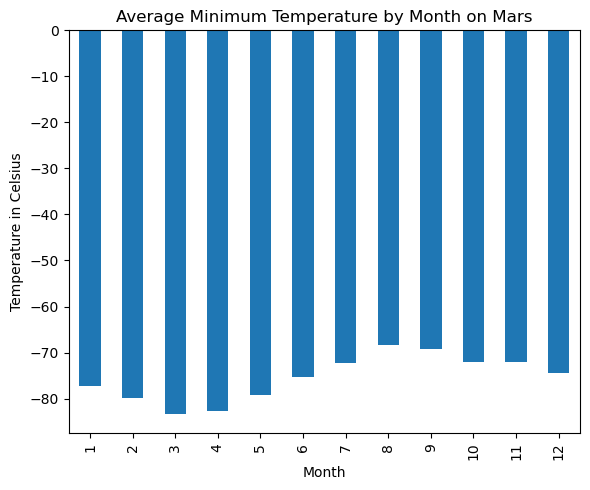

In [15]:
# Plot the average temperature by month

# Sort the index to ensure the months are in order
average_min_temp_by_month = average_min_temp_by_month.sort_index()

# Plot the average minimum temperature for each month
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
average_min_temp_by_month.plot(kind='bar', title='Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(range(0, 12), range(1, 13))  # Adjust x-ticks to show month numbers starting at 1
plt.tight_layout()  # Adjust layout for better fitting of elements
plt.show()

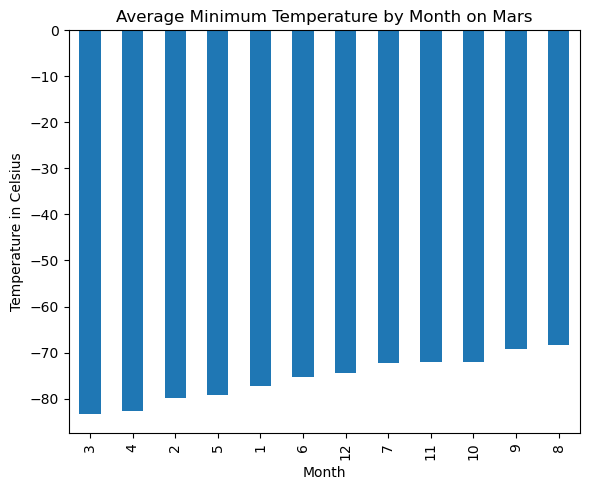

In [16]:
# Identify the coldest and hottest months in Curiosity's location

# Sort by average temperature (ascending order - from the coldest to the hottest)
sorted_avg_temp = average_min_temp_by_month.sort_values()

# Plot the average minimum temperature for each month in the sorted order
plt.figure(figsize=(6, 5))
sorted_avg_temp.plot(kind='bar', title='Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Set the x-ticks to match the order of your sorted months
plt.xticks(range(len(sorted_avg_temp)), sorted_avg_temp.index)
plt.tight_layout()  # Adjust layout for better fitting of elements
plt.show()

In [17]:
# 4. Average pressure by Martian month

average_pressure_by_month = df_mars.groupby('month')['pressure'].mean()
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


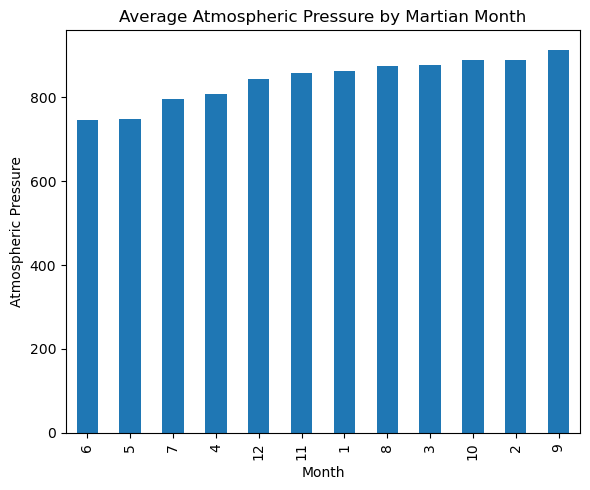

In [18]:
# Plot the average pressure by month

# Sort the average pressure by values (ascending order - from the smallest to the biggest)
sorted_average_pressure = average_pressure_by_month.sort_values()

# Plot the sorted average pressure values for each month
plt.figure(figsize=(6, 5))
sorted_average_pressure.plot(kind='bar', title='Average Atmospheric Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
# Custom x-ticks to show sorted month numbers
plt.xticks(range(len(sorted_average_pressure)), sorted_average_pressure.index)
plt.tight_layout()  # Adjust layout for better fitting of elements
plt.show()

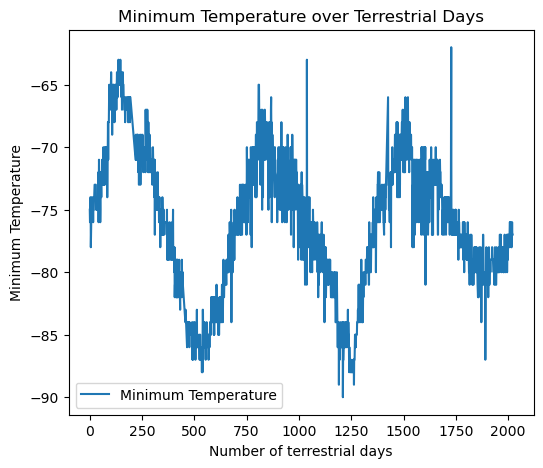

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Convert 'terrestrial_date' to a number of days since the start
# According to the documentation, pandas calculates df_mars['terrestrial_date'].min() only once and then uses the calculated value for all records of df_mars DataFrame
# It is important to check such things, because in case of millions of records, even small performance issue will become noticable
df_mars['terrestrial_day_number'] = (df_mars['terrestrial_date'] - df_mars['terrestrial_date'].min()).dt.days

# Plot the minimum temperature over the number of terrestrial days
plt.figure(figsize=(6, 5))
plt.plot(df_mars['terrestrial_day_number'], df_mars['min_temp'], label='Minimum Temperature')
plt.title('Minimum Temperature over Terrestrial Days')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.legend()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df_mars.to_csv('../Data/mars_data.csv', header=True, index=False)

In [21]:
# Close the browser
browser.quit()